# Análise de dados

## Introdução
Neste arquivo iremos fazer a análise dos dados do banco output.db. Para isso, vamos utilizar o módulo
matplotlib para fazer a visualização dos dados.

## Análise

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from data_manager import API

%matplotlib inline

In [2]:
# Mudando o caminho para o DB

API.DB_PATH = '../resources/DB/output.db'

In [3]:
total_findings = API.get_row_count('findings')
severities = API.SEVERITIES
auditors = API.get_auditors()
print(severities)

['Low', 'Medium', 'High', 'Informational', 'Undetermined']


In [4]:
severities_count = {'severity': [], 'quantity': []}
script = "SELECT COUNT(*) FROM findings WHERE severity = ?"
for severity in severities:
    severities_count['severity'].append(severity)
    quantity = API.execute(script, [severity])[0][0]
    severities_count['quantity'].append(quantity)

### Severidades.

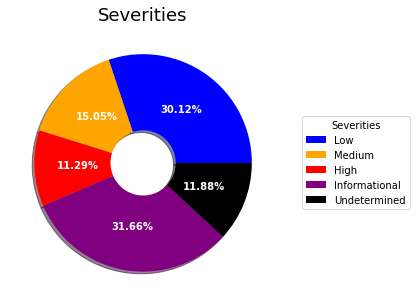

In [5]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(severities_count['quantity'],
                           colors=['blue', 'orange', 'red', 'purple', 'black'],
                           shadow=True,
                           wedgeprops=dict(width=0.7),
                           autopct='%.2f%%',
                           textprops=dict(color='w'))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Severities', size=18)
ax.legend(wedges, severities,
          title='Severities',
          loc='right',
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [6]:
auditors_vs_severity = {'auditor': [],
                        'severity':
                            {
                                'Low': [],
                                'Medium': [],
                                'High': [],
                                'Informational': [],
                                'Undetermined': []
                            },
                        'calls': []
                        }
for auditor in auditors:
    script = "SELECT COUNT(*) FROM findings WHERE auditor_id = ?"
    calls = API.execute(script, [auditor['id']])[0][0]
    if calls == 0:
        continue
    auditors_vs_severity['calls'].append(calls)
    auditors_vs_severity['auditor'].append(auditor['name'])

    for severity in auditors_vs_severity['severity']:
        script = f"SELECT COUNT(*) FROM findings WHERE severity = '{severity}' AND auditor_id = ?"
        quantity = API.execute(script, [auditor['id']])[0][0] / calls * 100
        auditors_vs_severity['severity'][severity].append(quantity)

low_mean = np.array(auditors_vs_severity['severity']['Low']).mean()
medium_mean = np.array(auditors_vs_severity['severity']['Medium']).mean()
high_mean = np.array(auditors_vs_severity['severity']['High']).mean()
informational_mean = np.array(auditors_vs_severity['severity']['Informational']).mean()
undetermined_mean = np.array(auditors_vs_severity['severity']['Undetermined']).mean()

print(f"""
Low Severity Mean: {low_mean:.3f}%
Medium Severity Mean: {medium_mean:.3f}%
High Severity Mean: {high_mean:.3f}%
Informational Severity Mean: {informational_mean:.3f}%
Undetermined Severity Mean: {undetermined_mean:.3f}%
""")


Low Severity Mean: 32.674%
Medium Severity Mean: 14.964%
High Severity Mean: 11.114%
Informational Severity Mean: 29.262%
Undetermined Severity Mean: 11.986%



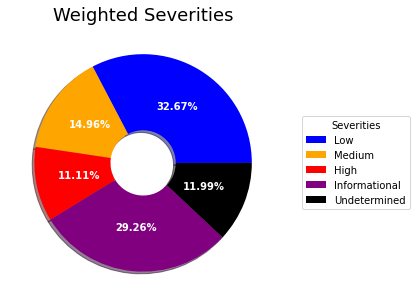

In [7]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie([low_mean, medium_mean, high_mean, informational_mean, undetermined_mean],
                           colors=['blue', 'orange', 'red', 'purple', 'black'],
                           shadow=True,
                           wedgeprops=dict(width=0.7),
                           autopct='%.2f%%',
                           textprops=dict(color='w'))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Weighted Severities', size=18)
ax.legend(wedges, severities,
          title='Severities',
          loc='right',
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

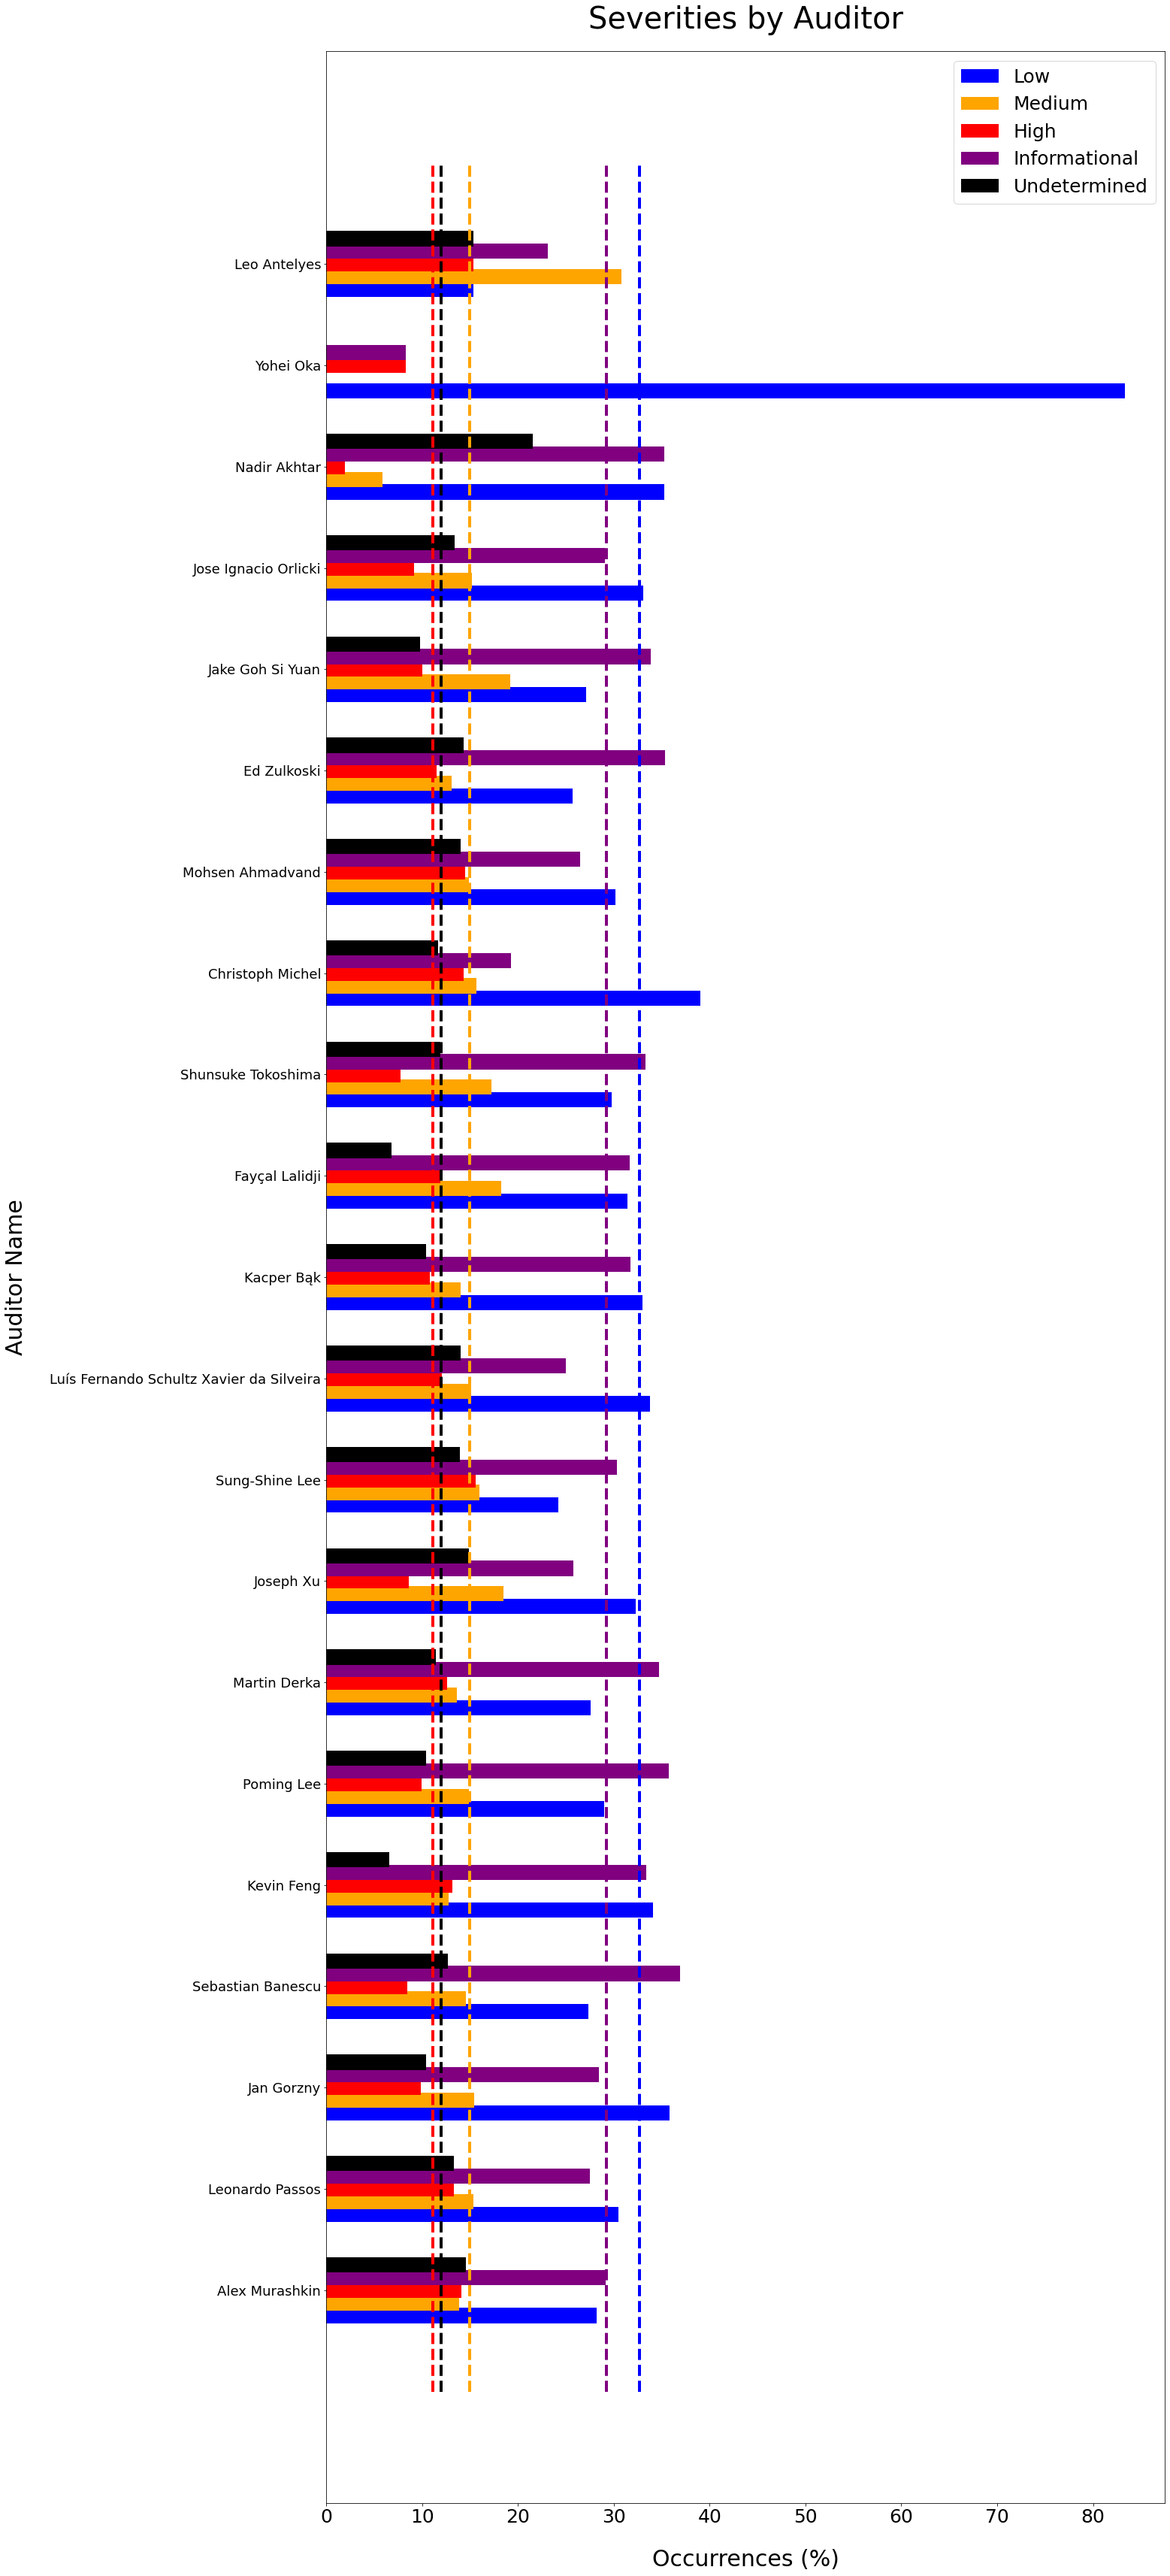

In [8]:
width = 0.15
x = np.arange(len(auditors_vs_severity['auditor']))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=30)

fig, ax = plt.subplots(figsize=(20, 60))

ax.barh(x - width * 2 / 1.2,
        auditors_vs_severity['severity']['Low'],
        width,
        label='Low',
        color='blue')
ax.barh(x - width / 1.2,
        auditors_vs_severity['severity']['Medium'],
        width,
        label='Medium',
        color='orange')
ax.barh(x,
        auditors_vs_severity['severity']['High'],
        width,
        label='High',
        color='red')
ax.barh(x + width / 1.2,
        auditors_vs_severity['severity']['Informational'],
        width,
        label='Informational',
        color='purple')
ax.barh(x + width * 2 / 1.2,
        auditors_vs_severity['severity']['Undetermined'],
        width,
        label='Undetermined',
        color='black')

ax.set_title('Severities by Auditor', size=40, pad=30)
ax.set_xlabel('Occurrences (%)', labelpad=30)
ax.set_ylabel('Auditor Name', labelpad=30)
ax.set_yticks(x)
ax.set_yticklabels(auditors_vs_severity['auditor'], ha='right')

ax.plot(np.ones(len(x) + 2) * low_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--', linewidth=4,
        color='blue')
ax.plot(np.ones(len(x) + 2) * medium_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='orange')
ax.plot(np.ones(len(x) + 2) * high_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='red')
ax.plot(np.ones(len(x) + 2) * informational_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='purple')
ax.plot(np.ones(len(x) + 2) * undetermined_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='black')

ax.legend(fontsize=25)
plt.show()

Os valores de ocorrências calculado acima é dado pelo número de ocorrências <em> o </em> dividido pelo número de
auditorias do auditor em questão <em> c </em> multiplicado por 100.

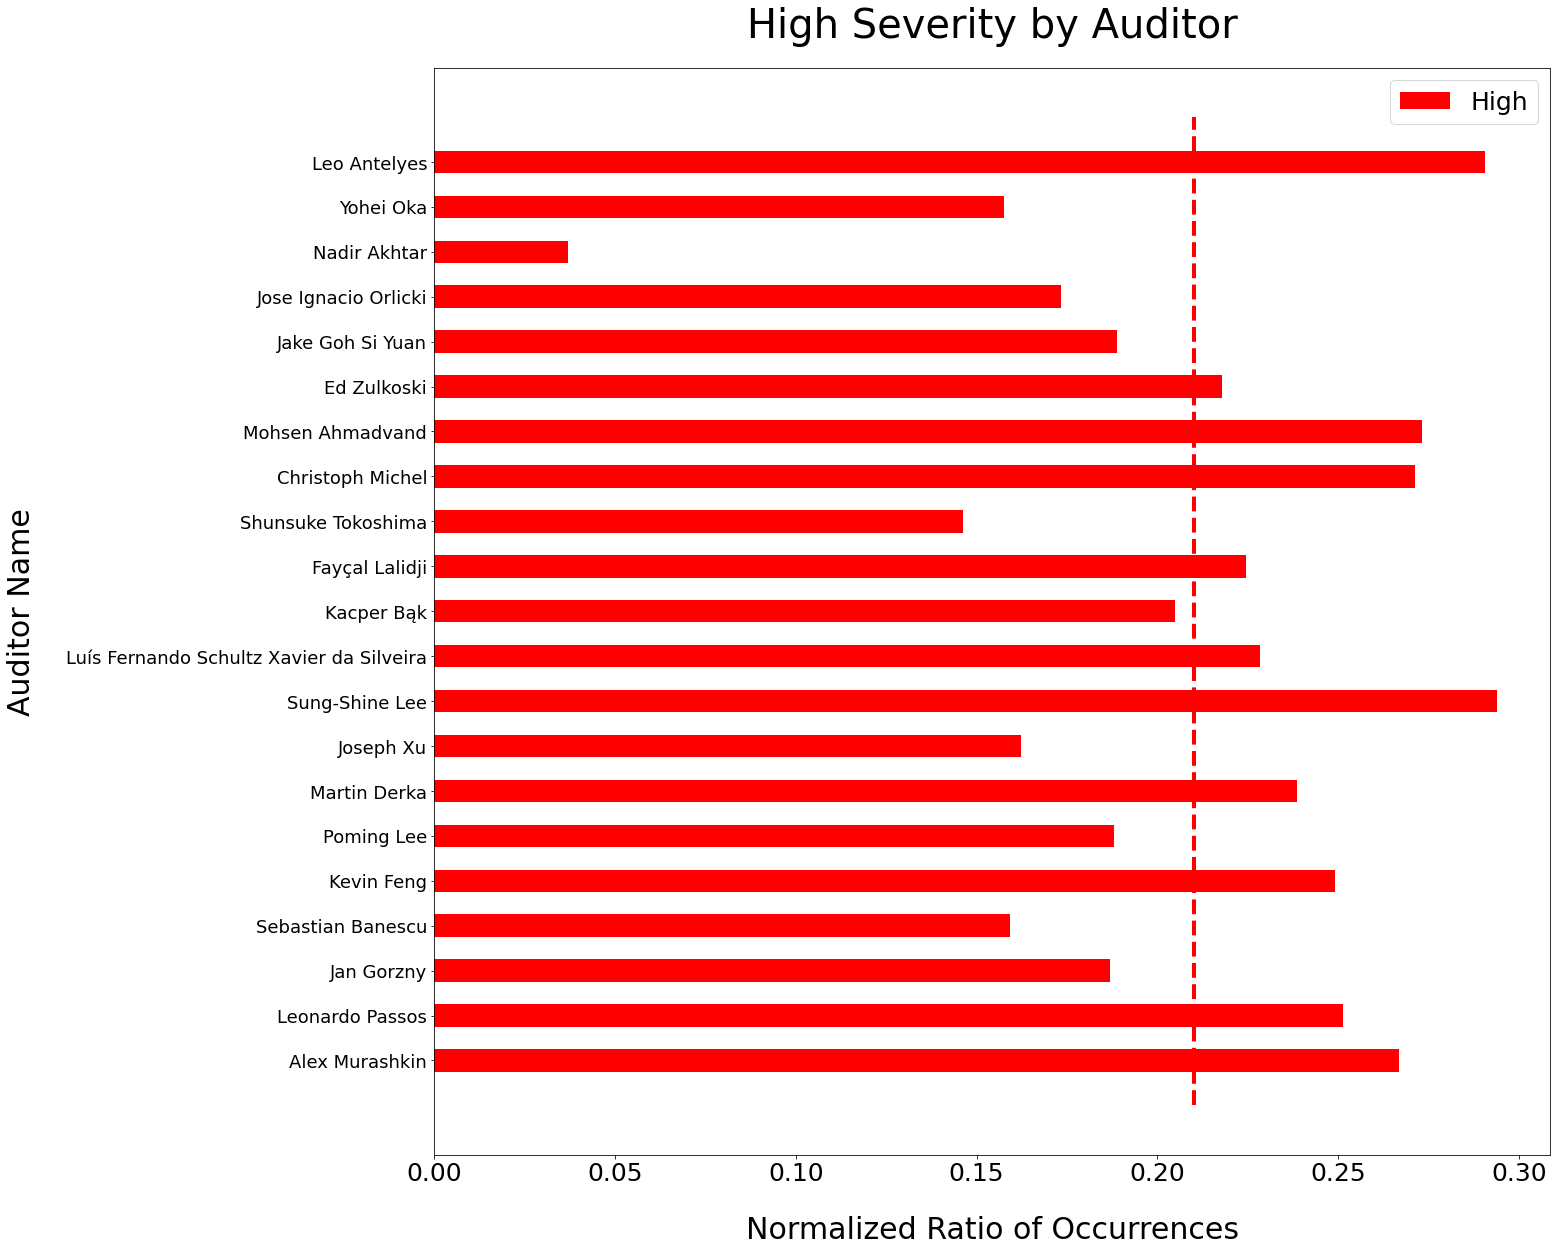

In [9]:
norm = np.linalg.norm(np.array(auditors_vs_severity['severity']['High']))
normalized_high_severity = np.array(auditors_vs_severity['severity']['High']) / norm

width = 0.5
x = np.arange(len(auditors_vs_severity['auditor']))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=30)

fig, ax = plt.subplots(figsize=(20, 20))

ax.barh(x,
        normalized_high_severity,
        width,
        label='High',
        color='red')

ax.set_title('High Severity by Auditor', size=40, pad=30)
ax.set_xlabel('Normalized Ratio of Occurrences', labelpad=30)
ax.set_ylabel('Auditor Name', labelpad=30)
ax.set_yticks(x)
ax.set_yticklabels(auditors_vs_severity['auditor'], ha='right')

ax.plot(np.ones(len(x) + 2) * high_mean / norm,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='red')

ax.legend(fontsize=25)
plt.show()

In [10]:
norm = np.linalg.norm(np.array(auditors_vs_severity['calls']))
normalized_calls = np.array(np.array(auditors_vs_severity['calls'])) / norm

df = pd.DataFrame({
    'auditor': auditors_vs_severity['auditor'],
    'High': normalized_high_severity,
    'Calls': normalized_calls
})
df

,auditor,High,Calls
0,Alex Murashkin,0.266842,0.154768
1,Leonardo Passos,0.251481,0.277293
2,Jan Gorzny,0.186871,0.257230
3,Sebastian Banescu,0.159283,0.344287
4,Kevin Feng,0.249106,0.157634
5,Poming Lee,0.188048,0.291623
6,Martin Derka,0.238575,0.215672
7,Joseph Xu,0.162402,0.137572
8,Sung-Shine Lee,0.293964,0.177338
9,Luís Fernando Schultz Xavier da Silveira,0.228433,0.130406


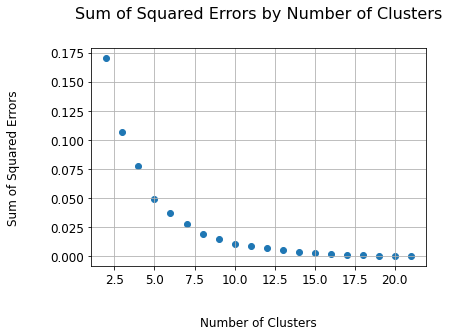

In [11]:
clusters = []
sse = []
for k in range(2, len(auditors)):
    km = KMeans(n_clusters=k)
    clusters.append(km.fit_predict(df[['Calls', 'High']]))
    sse.append(km.inertia_)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

fig, ax = plt.subplots()
ax.scatter(range(2, len(auditors)), sse)

ax.set_title("Sum of Squared Errors by Number of Clusters", fontsize=16, pad=30)
ax.set_xlabel("Number of Clusters", labelpad=30)
ax.set_ylabel("Sum of Squared Errors", labelpad=30)
ax.grid()

plt.show()

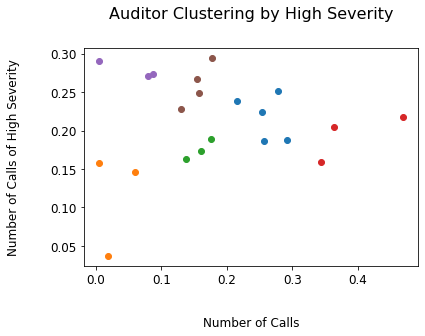

In [12]:
df['Cluster'] = clusters[4]

fig, ax = plt.subplots()

for i in range(6):
    df_scatter = df[df['Cluster'] == i]
    ax.scatter(df_scatter['Calls'], df_scatter['High'])

ax.set_title("Auditor Clustering by High Severity", fontsize=16, pad=30)
ax.set_xlabel("Number of Calls", labelpad=30)
ax.set_ylabel("Number of Calls of High Severity", labelpad=30)

plt.show()

Os valores apresentados no gráfico anterior são valores normalizados. Os grupos foram encontrados com o
algoritmo K-means usando K = 6. Esse valor de K foi escolhido com base no gráfico
Somatório do Quadrado dos Erros por Número de Clusters pelo método do cotovelo.

In [13]:
df

,auditor,High,Calls,Cluster
0,Alex Murashkin,0.266842,0.154768,5
1,Leonardo Passos,0.251481,0.277293,0
2,Jan Gorzny,0.186871,0.257230,0
3,Sebastian Banescu,0.159283,0.344287,3
4,Kevin Feng,0.249106,0.157634,5
5,Poming Lee,0.188048,0.291623,0
6,Martin Derka,0.238575,0.215672,0
7,Joseph Xu,0.162402,0.137572,2
8,Sung-Shine Lee,0.293964,0.177338,5
9,Luís Fernando Schultz Xavier da Silveira,0.228433,0.130406,5


### Análise por findings title

In [14]:
df = API.get_dataframe('SELECT title, severity, auditor_id FROM findings')

In [15]:
df

,title,severity,auditor_id
0,Unclear Expected Locking Behaviour,Low,1
1,Block Timestamp Manipulation,Low,1
2,Privileged Roles and Ownership,Low,1
3,Unclear Expected Token Supply,Informational,1
4,Unclear Expected Locking Behaviour,Low,2
...,...,...,...
10656,Several issues in Token contract,Undetermined,6
10657,Linked account ID can be overwritten,Undetermined,6
10658,Unused functions and files,Undetermined,6
10659,Potential waste of gas,Undetermined,6


In [16]:
titles_set = set()

for line in df.iloc():
    print(line.values)

['Unclear Expected Locking Behaviour' 'Low' 1]
['Block Timestamp Manipulation' 'Low' 1]
['Privileged Roles and Ownership' 'Low' 1]
['Unclear Expected Token Supply' 'Informational' 1]
['Unclear Expected Locking Behaviour' 'Low' 2]
['Block Timestamp Manipulation' 'Low' 2]
['Privileged Roles and Ownership' 'Low' 2]
['Unclear Expected Token Supply' 'Informational' 2]
['Unclear Expected Locking Behaviour' 'Low' 3]
['Block Timestamp Manipulation' 'Low' 3]
['Privileged Roles and Ownership' 'Low' 3]
['Unclear Expected Token Supply' 'Informational' 3]
['Integer Overflow / Underflow' 'Low' 2]
['Missing Input Validation' 'Low' 2]
['Users Cannot Withdraw their Fractional Part of Ether Deposits' 'Low' 2]
['Some Functions Lack Unit Tests' 'Informational' 2]
['Old ERC20 Tokens May Not Work With IDEX' 'Informational' 2]
['Unlocked Pragma' 'Informational' 2]
['Race Conditions / Front-Running' 'Informational' 2]
['Unused Imports' 'Informational' 2]
['Gas Usage / `for` Loop Concerns' 'Informational' 2]
[

### Análise por palavras

In [17]:
from data_parser import words_from_json

words_dict = words_from_json('../resources/JSON/output.json')

Counting words


In [18]:
words_dict[0]['findings']

[{'id': {'0': 1},
  'title': {'unclear': 1, 'expected': 1, 'locking': 1, 'behaviour': 1},
  'severity': {'low': 1},
  'files_involved': [{'capabilities': 1, 'timelockable': 1, 'sol': 1}],
  'description': {'repeated': 1,
   'calls': 1,
   'to': 4,
   'the': 8,
   'lock': 2,
   'method': 1,
   'override': 1,
   'previous': 1,
   'locks': 1,
   'set': 1,
   'for': 1,
   'given': 1,
   'token': 1,
   'holder': 1,
   'in': 1,
   'addition': 1,
   'if': 1,
   'multiple': 1,
   'transactions': 1,
   'are': 1,
   'sent': 1,
   'at': 1,
   'same': 1,
   'time': 1,
   'a': 1,
   'hypothetical': 1,
   'miner': 2,
   'holding': 1,
   'tokens': 1,
   'could': 1,
   'choose': 1,
   'mine': 1,
   'transaction': 2,
   'that': 1,
   'is': 1,
   'more': 1,
   'favorable': 1,
   'thus': 1,
   'making': 1,
   'contract': 1,
   'vulnerable': 1,
   'ordering': 1},
  'exploit_scenario': {},
  'recommendation': {'1': 1,
   'documenting': 1,
   'the': 7,
   'expected': 2,
   'behaviour': 2,
   'when': 1,
   '

In [48]:
# Vamos verificar quais são as palavras mais frequentes em findings com severidade High
high_severity_findings_descriptions = []
for issue in words_dict:
    for finding in issue['findings']:
        if "high" in finding['severity'].keys():
            high_severity_findings_descriptions.append(finding['description'])

# Agrupando as palavras
high_severity_findings_words = {}
for description in high_severity_findings_descriptions:
    for word in description.keys():
        if word in high_severity_findings_words.keys():
            high_severity_findings_words[word] += description[word]
        else:
            high_severity_findings_words[word] = description[word]

high_severity_findings_words = sorted(high_severity_findings_words.items(), key=lambda w: w[1], reverse=True)

In [50]:
high_severity_findings_words[:40]

[('the', 2413),
 ('to', 862),
 ('is', 707),
 ('a', 600),
 ('of', 578),
 ('in', 552),
 ('and', 551),
 ('be', 365),
 ('that', 342),
 ('not', 325),
 ('this', 294),
 ('it', 251),
 ('for', 248),
 ('can', 231),
 ('function', 205),
 ('as', 190),
 ('if', 186),
 ('contract', 180),
 ('on', 176),
 ('an', 176),
 ('by', 173),
 ('are', 173),
 ('any', 169),
 ('will', 135),
 ('with', 135),
 ('tokens', 128),
 ('amount', 118),
 ('which', 113),
 ('user', 113),
 ('or', 111),
 ('from', 110),
 ('when', 108),
 ('value', 106),
 ('1', 99),
 ('code', 96),
 ('address', 96),
 ('does', 95),
 ('at', 90),
 ('should', 90),
 ('sol', 90)]

In [51]:
# Vamos verificar quais são as palavras mais frequentes em findings com severidade Low
low_severity_findings_descriptions = []
for issue in words_dict:
    for finding in issue['findings']:
        if "low" in finding['severity'].keys():
            low_severity_findings_descriptions.append(finding['description'])

# Agrupando as palavras
low_severity_findings_words = {}
for description in low_severity_findings_descriptions:
    for word in description.keys():
        if word in low_severity_findings_words.keys():
            low_severity_findings_words[word] += description[word]
        else:
            low_severity_findings_words[word] = description[word]

low_severity_findings_words = sorted(low_severity_findings_words.items(), key=lambda w: w[1], reverse=True)

In [52]:
low_severity_findings_words[:40]

[('the', 4519),
 ('to', 1982),
 ('is', 1459),
 ('in', 1252),
 ('of', 1186),
 ('a', 1115),
 ('and', 1050),
 ('not', 820),
 ('be', 776),
 ('that', 768),
 ('for', 638),
 ('this', 586),
 ('contract', 539),
 ('it', 530),
 ('if', 503),
 ('function', 493),
 ('sol', 476),
 ('are', 457),
 ('on', 434),
 ('as', 429),
 ('address', 403),
 ('1', 393),
 ('0', 344),
 ('an', 341),
 ('may', 336),
 ('from', 324),
 ('will', 321),
 ('can', 318),
 ('check', 304),
 ('does', 300),
 ('with', 292),
 ('contracts', 286),
 ('by', 276),
 ('should', 272),
 ('which', 253),
 ('value', 252),
 ('or', 250),
 ('zero', 239),
 ('functions', 235),
 ('have', 219)]